In [1]:
%matplotlib inline
import json
import pandas as pd

# Using Data APIs in Python to Improve Urban Life



## Visualizing Poverty in Gainesville

### Obtaining US Census Data Through Python Packages

In [2]:
# pip install census
# Go to http://api.census.gov/data/key_signup.html to key and API key
with open('census.key') as json_file:
    data = json.load(json_file)
census_api_key = data["api_key"]

from census import Census

In [5]:
# http://api.census.gov/data/2014/acs5/variables.html
# http://api.census.gov/data/2014/acs5/variables/B01003_001E.json
# http://api.census.gov/data/2014/acs5/variables/B14006_002E.json
# http://api.census.gov/data/2014/acs5/variables/B17009_002E.json


census_api = Census(census_api_key)
census_data = census_api.acs5.state_county_tract(
    ('NAME', 'B01003_001E', 'B14006_002E', 'B17009_002E'), 
    '12', '001', Census.ALL)
poverty_by_tract = pd.DataFrame.from_dict(census_data)
poverty_by_tract.describe()

,B01003_001E,B14006_002E,B17009_002E,NAME,county,state,tract
count,56,56,56,56,56,56,56
unique,56,55,55,56,1,1,56
top,822,1477,222,"Census Tract 22.07, Alachua County, Florida",001,12,001907
freq,1,2,2,1,56,56,1


### Mapping Poverty by Census Tract on Top of Basemap Data Layers

#### Downloading Census Tract Layer

In [30]:
# pip install https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz
# This is 130 MB, needed geos, numpy, matplotlib, pandas first, also apt install libgeos-dev
# or apt install python-mpltoolkits.basemap python-mpltoolkits.basemap-data

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### Drawing a Map of Census Tracts

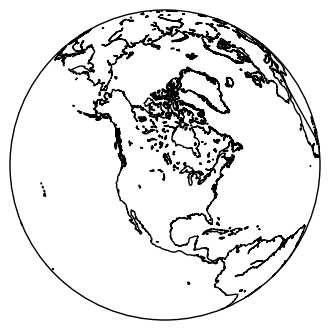

In [32]:
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
 
plt.show()

## Does Having Natural Gas Service Save Money?

### Obtaining Gaineville Regional Utilities (GRU) Billing Data Through Socrata's API from data.cityofgainesville.org

### Calculating Savings

### Obtaining Property Appraiser Data Through Manual Downloads from www.acpafl.org

In [12]:
appraiser_data = pd.read_csv("data/32605_00100_50k_100k.csv")
appraiser_data.head()

,Parcel_Num,Owner_Mail_Name,Owner_Mail_CO,Owner_Mail_Addr1,Owner_Mail_Addr2,Owner_Mail_City,Owner_Mail_State,Owner_Mail_Zip,Section,Township,...,School_Exempt_Amount,Tax_Amount,Loc_Address,Sale_Date,Sale_Price,Sale_VacImp,Sale_Qualified,Sale_Book,Sale_Page,Sale_Instrument
0,00450-000-000,"WARD, JODI",NaN,1236 NW 39TH DR,NaN,GAINESVILLE,FL,32605-4647,2,8,...,0.0,1728.82,18743 NW 230TH ST,05/10/2011,100.0,I,U,4031.0,449.0,WD
1,00528-000-000,"DIRK, LYNN M",NaN,1604 NW 21ST AVE,NaN,GAINESVILLE,FL,32605-4062,34,7,...,0.0,1286.20,23674 NW 188TH AV,02/15/2006,100.0,I,U,3317.0,820.0,OD
2,01408-113-000,"MILLER, GREGORY A & KAREN L",NaN,PO BOX 2693,NaN,HIGH SPRINGS,FL,32655-2693,3,8,...,2610.0,1621.35,17521 NW 239TH TER,05/27/1994,42500.0,I,Q,1970.0,562.0,WD
3,01981-012-004,"BOGART, JOSEPH W",NaN,4022 NW 36TH ST,NaN,GAINESVILLE,FL,32605-1445,4,10,...,0.0,1687.81,26442 SW 4TH AV,02/18/2008,81000.0,I,U,3745.0,220.0,CT
4,02534-001-011,"MITCHELL, LAURIE DUKES TRUSTEE",NaN,7818 NW 22ND LN,NaN,GAINESVILLE,FL,32605,9,10,...,120.0,2278.50,25306 SW 16TH AV,09/23/2008,65000.0,I,U,3831.0,1398.0,WD


### Graphing Single Family Residence Savings by Square Footage

## Which Homes Should We Help Convert to Natural Gas?


### Geocoding Residences with Google's Service With the geocoder Package 

In [ ]:
with open('google.key') as json_file:
    data = json.load(json_file)
google_api_key = data["api_key"]

In [21]:
import geocoder
g = geocoder.google("1604 NW 21ST AVE GAINESVILLE FL 32605-4062", 
                    key=google_api_key)
g.json

{'accuracy': u'ROOFTOP',
 'address': u'1604 NW 21 Ave, Gainesville, FL 32605, USA',
 'bbox': {'northeast': [29.6736079802915, -82.3409870197085],
  'southwest': [29.6709100197085, -82.34368498029151]},
 'city': u'Gainesville',
 'confidence': 9,
 'country': u'US',
 'county': u'Alachua County',
 'encoding': 'utf-8',
 'housenumber': u'1604',
 'lat': 29.672259,
 'lng': -82.342336,
 'location': '1604 NW 21ST AVE GAINESVILLE FL 32605-4062',
 'ok': True,
 'place': u'ChIJJQ6ZKWOk6IgRTTtpZvrFbxA',
 'postal': u'32605',
 'provider': 'google',
 'quality': u'street_address',
 'state': u'FL',
 'status': 'OK',
 'status_code': 200,
 'street': u'NW 21 Ave'}

### Adding Residences Without Gas Service to the Map